# Linear Regression

    1. Fitting line in the data (Done on a 2D graph)
    2. To see whether we have a direct proportion (If the price goes up, the sales decreases)
    3. Given the data points, find M and B (Slope and Y - Intercept)
 
## Model
    1. A model is a formula where one variable varies depending on one or more independantt variables.

In [15]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy import stats

In [16]:
dataframe = pandas.read_csv('./../data/Advertising.csv')

In [17]:
X = dataframe[['TV','Radio','Newspaper']]
y = dataframe['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)  
len(y_train)
# x[x.index<=140]
# len(y_test)

140

In [18]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predicted = regressor.predict(X_test)
print('Coefficient : ' , regressor.coef_)
print('Intercept : ' , regressor.intercept_)

Coefficient :  [0.04391531 0.20027962 0.00184368]
Intercept :  2.8802552863313213


In [19]:
y_test = numpy.array(y_test)
y_test

array([11.3,  8.4,  8.7, 25.4, 11.7,  8.7,  7.2, 13.2,  9.2, 16.6, 24.2,
       10.6, 10.5, 15.6, 11.8, 13.2, 17.4,  1.6, 14.7, 17. , 26.2, 10.3,
       14.9, 12.9,  8.1, 15.2, 12.6, 22.6, 11.6,  8.5, 12.5, 23.7, 16.1,
       21.8,  5.6,  6.7,  9.7, 12.9, 13.6,  7.2, 10.8,  9.5, 15. , 15.9,
       17.1, 14. ,  4.8,  8.7, 15.9, 10.4, 12.4, 19.7, 17.6, 15.5, 10.1,
        9.7, 21.4, 14.4, 16.6,  5.5])

In [20]:
y_predicted

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [21]:
pandas.DataFrame({"y_test" : y_test , "y_predicted" : y_predicted})

,y_test,y_predicted
0,11.3,10.058667
1,8.4,7.433188
2,8.7,6.953057
3,25.4,24.168746
4,11.7,11.981720
5,8.7,6.544647
6,7.2,13.194268
7,13.2,14.902403
8,9.2,11.076753
9,16.6,16.250617


In [22]:
r2_score(y_test , y_predicted)

0.8649018906637793

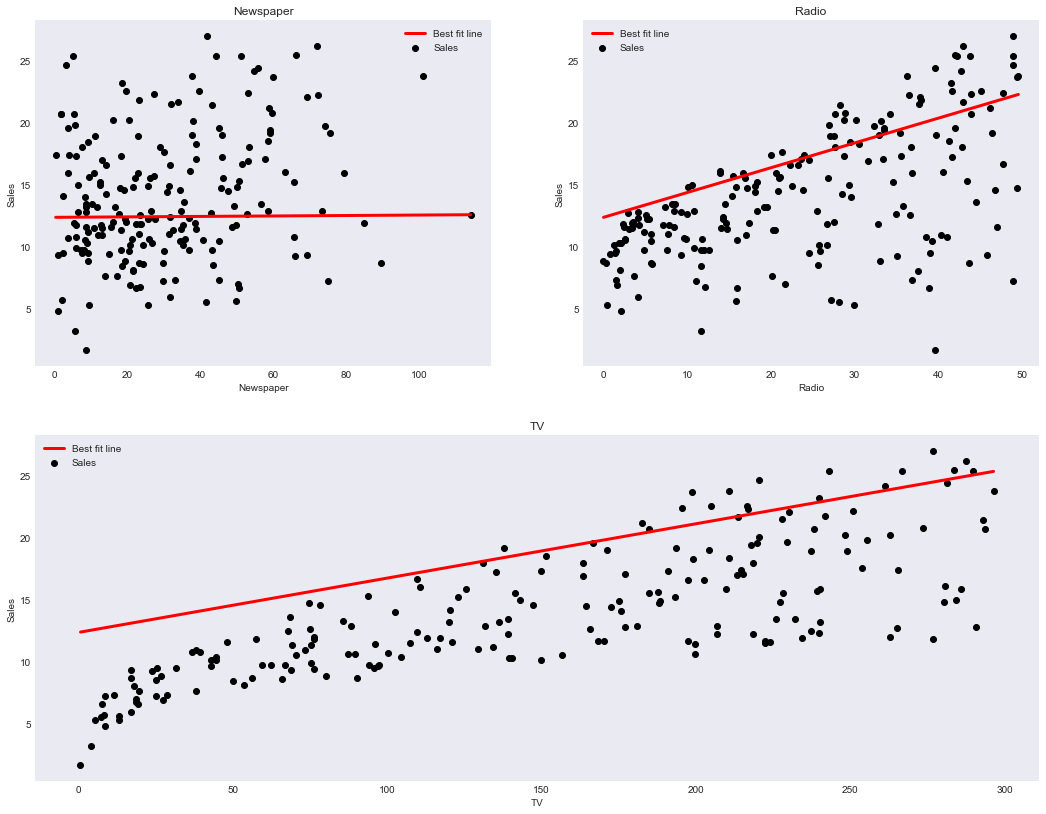

In [23]:
pyplot.figure(figsize = (18,14))
pyplot.style.use('seaborn-dark')

slope , intercept , rvalue , pvalue , stderr = stats.linregress(X.Newspaper , y)

pyplot.subplot(2,2,1)
pyplot.title('Newspaper')
pyplot.xlabel('Newspaper')
pyplot.ylabel('Sales')
pyplot.scatter(X.Newspaper , y , color = 'black')
X1 = numpy.linspace(numpy.min(X.Newspaper) , numpy.max(X.Newspaper) , 500)
pyplot.plot(X1 , (regressor.coef_[2] * X1 + intercept) , color='red', linewidth = 3 , label = 'Best fit line')
pyplot.legend()

pyplot.subplot(2,2,2)
pyplot.title('Radio')
pyplot.xlabel('Radio')
pyplot.ylabel('Sales')
pyplot.scatter(X.Radio , y , color = 'black')
X2 = numpy.linspace(numpy.min(X.Radio) , numpy.max(X.Radio) , 500)
pyplot.plot(X2 , (regressor.coef_[1] * X2 + intercept) , color='red', linewidth = 3 , label = 'Best fit line')
pyplot.legend()

pyplot.subplot(2,2,(3,4))
pyplot.title('TV')
pyplot.xlabel('TV')
pyplot.ylabel('Sales')
pyplot.scatter(X.TV , y , color = 'black')
X3 = numpy.linspace(numpy.min(X.TV) , numpy.max(X.TV) , 500)
pyplot.plot(X3 , (regressor.coef_[0] * X3 + intercept) , color='red', linewidth = 3 , label = 'Best fit line')
pyplot.legend()

In [ ]:
res = [1,0]